IMPOR PUSTAKA

In [1215]:
# import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

LOAD DATASET

In [1216]:
# Membaca dataset dari file CSV
df = pd.read_csv('Prabowo Subianto.csv')
df.head()

,Unnamed: 0.1,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,label
0,0,2023-04-16 09:44:01+00:00,2018-07-07 09:43:19+00:00,1.020000e+18,477,337,12568,Khoiril Anwar,gemira and semeton bali muslims declare suppor...,Positive
1,1,2023-04-16 09:27:10+00:00,2019-10-29 04:40:11+00:00,1.190000e+18,27910,20171,63723,NaN,fahnoor inismyname that's why we support the p...,Negative
2,2,2023-04-16 08:32:06+00:00,2022-12-16 05:02:00+00:00,1.600000e+18,144,114,6596,NaN,"this time, jokowi's quota for wrinkles on his ...",Positive
3,3,2023-04-16 08:19:16+00:00,2016-01-11 23:57:34+00:00,4.745574e+09,67,99,7395,NaN,"happy birthday to kopassus, may the spirit of ...",Positive
4,4,2023-04-16 07:59:41+00:00,2022-12-17 02:29:03+00:00,1.600000e+18,31,27,192,NaN,gerindra badung party held legislative legisla...,Negative


MEMILIH KOLOM TEXT DAN LABEL

In [1217]:
# Mengambil hanya kolom 'Text' dan 'label'
df = df[['Text', 'label']]

# Menampilkan beberapa baris pertama dari DataFrame yang sudah difilter
df.head()

,Text,label
0,gemira and semeton bali muslims declare suppor...,Positive
1,fahnoor inismyname that's why we support the p...,Negative
2,"this time, jokowi's quota for wrinkles on his ...",Positive
3,"happy birthday to kopassus, may the spirit of ...",Positive
4,gerindra badung party held legislative legisla...,Negative


MENGHAPUS MISSING VALUE

In [1218]:
# Mengecek jumlah nilai yang hilang (missing values) di setiap kolom sebelum penghapusan
print("Jumlah missing values per kolom sebelum dihapus:")
print(df.isnull().sum())
print("\n")

# Menghapus missing values setelah langkah pembersihan lainnya selesai
df.dropna(inplace=True)

# Mengecek jumlah missing values setelah penghapusan
print("Jumlah missing values per kolom setelah dihapus:")
print(df.isnull().sum())
print("\n")

Jumlah missing values per kolom sebelum dihapus:
Text     88
label     0
dtype: int64


Jumlah missing values per kolom setelah dihapus:
Text     0
label    0
dtype: int64




MENGHITUNG JUMLAH BARIS

In [1219]:
# Menghitung jumlah baris (data frame)
jumlah_baris = len(df)

print(f"Jumlah baris di CSV: {jumlah_baris}")

# Menghitung jumlah baris dengan label 'Positive' pada kolom 'sentiment'
jumlah_positive = df[df['label'] == 'Positive'].shape[0]

print(f"Jumlah baris dengan label 'Positive': {jumlah_positive}")

# Menghitung jumlah baris dengan label 'Negative' pada kolom 'sentiment'
jumlah_negative = df[df['label'] == 'Negative'].shape[0]

print(f"Jumlah baris dengan label 'Negative': {jumlah_negative}")

Jumlah baris di CSV: 9912
Jumlah baris dengan label 'Positive': 7369
Jumlah baris dengan label 'Negative': 2543


MEMILIH BARIS DENGAN LABEL POSITIF DAN NEGATIF SEBANYAK MASING-MASING 2500

In [ ]:
# Memilih data dengan label 'Positive' dan 'Negative' sebanyak 2500 saja
positive_data = df[df['label'] == 'Positive'].sample(n=2500, random_state=42)
negative_data = df[df['label'] == 'Negative'].sample(n=2500, random_state=42)

# Menggabungkan data positif dan negatif
df = pd.concat([positive_data, negative_data])

# Tampilkan data teratas
df.head()

,Text,label
6616,the majority of prabowo diaga uno voters in th...,Positive
2519,"apart from that, according to dedy, jokowi's t...",Positive
8164,"at the xiii musra event in east java, pak bowo...",Positive
8400,in several meetings between president jokowi a...,Positive
3337,daftarcom jakarta chairman of the dpp gerindra...,Positive


MELIHAT DISTRIBUSI DARI KOLOM LABEL

<Axes: xlabel='label'>

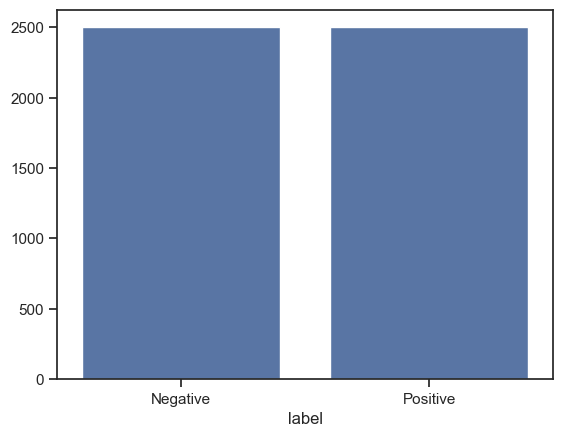

In [ ]:
# bar chart untuk melihat distribusi dari kolom 'label'
result = df.groupby(['label']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

MELABELKAN SENTIMEN 1 (POSITIF) DAN 0 (NEGATIF)

In [1222]:
# membuat kolom 'sentiment' untuk menandai sentimen (positif dan negatif)
sentimen = [] # inisialisasi list
for index, row in df.iterrows(): # iterasi melalui setiap baris data
    if row['label'] == 'Positive' : # jika label positif
        sentimen.append(1) # sentimen positif
    else: # jika label negatif
        sentimen.append(0) # sentimen negatif
df['sentiment'] = sentimen # menambahkan kolom 'sentiment'
df.head() # tampilkan data teratas

,Text,label,sentiment
6616,the majority of prabowo diaga uno voters in th...,Positive,1
2519,"apart from that, according to dedy, jokowi's t...",Positive,1
8164,"at the xiii musra event in east java, pak bowo...",Positive,1
8400,in several meetings between president jokowi a...,Positive,1
3337,daftarcom jakarta chairman of the dpp gerindra...,Positive,1


MELIHAT DISTRIBUSI DARI KOLOM SENTIMEN

Text(0.5, 1.0, 'Distribution of sentiment')

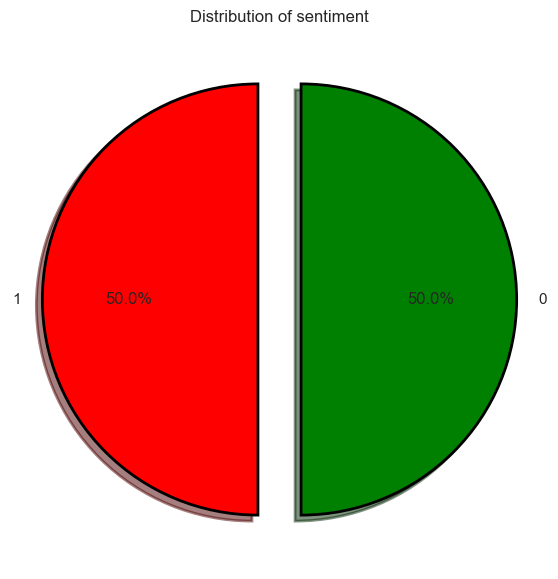

In [1223]:
# melihat distribusi dari kolom 'sentiment' dengan pie chart
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':2, 'edgecolor': 'black'}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1)
tags.plot( 
    kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
    startangle=90, wedgeprops=wp, explode=explode, label=''
)
plt.title('Distribution of sentiment')

PREPOCESSING TEXT

In [1225]:
import re

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Hapus URL
    text = re.sub(r'@\w+', '', text)  # Hapus mention
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hapus karakter non-alfabet
    text = re.sub(r'\s+', ' ', text)  # Hapus whitespace ekstra
    return text.strip().lower()  # Hapus spasi di awal dan akhir dan ubah menjadi huruf kecil

# Terapkan fungsi ke kolom content
df['Text'] = df['Text'].apply(clean_text)

df.to_csv('filtered_file.csv')

# Tampilkan hasilnya
print(df)

                                                   Text     label  sentiment
6616  the majority of prabowo diaga uno voters in th...  Positive          1
2519  apart from that according to dedy jokowis toge...  Positive          1
8164  at the xiii musra event in east java pak bowos...  Positive          1
8400  in several meetings between president jokowi a...  Positive          1
3337  daftarcom jakarta chairman of the dpp gerindra...  Positive          1
...                                                 ...       ...        ...
5796  the person who will run for the presidential e...  Negative          0
8660            prabowo subianto president of indonesia  Negative          0
5725               indonesian president prabowo rosiade  Negative          0
8338  when prabowo ran for president prabowos presid...  Negative          0
1129  according to him jokowi will be the one who de...  Negative          0

[5000 rows x 3 columns]


TOKENISASI

In [1226]:
# impor word_tokenize dari modul nltk
from nltk.tokenize import RegexpTokenizer 

# tokenisasi
regexp = RegexpTokenizer(r'\w+')
df['Text_token'] = df['Text'].apply(regexp.tokenize)

df.to_csv('Tokenizing.csv')

df.head()

,Text,label,sentiment,Text_token
6616,the majority of prabowo diaga uno voters in th...,Positive,1,"[the, majority, of, prabowo, diaga, uno, voter..."
2519,apart from that according to dedy jokowis toge...,Positive,1,"[apart, from, that, according, to, dedy, jokow..."
8164,at the xiii musra event in east java pak bowos...,Positive,1,"[at, the, xiii, musra, event, in, east, java, ..."
8400,in several meetings between president jokowi a...,Positive,1,"[in, several, meetings, between, president, jo..."
3337,daftarcom jakarta chairman of the dpp gerindra...,Positive,1,"[daftarcom, jakarta, chairman, of, the, dpp, g..."


MENGHILANGKAN STOPWORD

In [1227]:
# menghilangkan stopwords 

# import nltk stopwords
from nltk.corpus import stopwords

# membuat list stopwords bahasa Indonesia
stopwords = nltk.corpus.stopwords.words("english")

# menambahkan custom stopwords 
# my_stopwords = ['prabowo', 'subianto', 'president', 'presidential', 'election', 'candidate']
# stopwords.extend(my_stopwords)

# menhilangkan stopwords
df['Text_token'] = df['Text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head()

,Text,label,sentiment,Text_token
6616,the majority of prabowo diaga uno voters in th...,Positive,1,"[majority, prabowo, diaga, uno, voters, presid..."
2519,apart from that according to dedy jokowis toge...,Positive,1,"[apart, according, dedy, jokowis, togetherness..."
8164,at the xiii musra event in east java pak bowos...,Positive,1,"[xiii, musra, event, east, java, pak, bowos, n..."
8400,in several meetings between president jokowi a...,Positive,1,"[several, meetings, president, jokowi, ministr..."
3337,daftarcom jakarta chairman of the dpp gerindra...,Positive,1,"[daftarcom, jakarta, chairman, dpp, gerindra, ..."


MENGHILANGKAN KATA KURANG DARI 3

In [1229]:
# Menghapus kata yang panjangnya kurang dari 3 dan menyimpannya di kolom 'text_string'
df['text_string'] = df['Text_token'].apply(lambda x: ' '.join([item for item in x]))

df.to_csv('Stopword.csv')

# Menampilkan hasil
df.head()

,Text,label,sentiment,Text_token,text_string
6616,the majority of prabowo diaga uno voters in th...,Positive,1,"[majority, prabowo, diaga, uno, voters, presid...",majority prabowo diaga uno voters presidential...
2519,apart from that according to dedy jokowis toge...,Positive,1,"[apart, according, dedy, jokowis, togetherness...",apart according dedy jokowis togetherness prab...
8164,at the xiii musra event in east java pak bowos...,Positive,1,"[xiii, musra, event, east, java, pak, bowos, n...",xiii musra event east java pak bowos name reso...
8400,in several meetings between president jokowi a...,Positive,1,"[several, meetings, president, jokowi, ministr...",several meetings president jokowi ministry def...
3337,daftarcom jakarta chairman of the dpp gerindra...,Positive,1,"[daftarcom, jakarta, chairman, dpp, gerindra, ...",daftarcom jakarta chairman dpp gerindra party ...


MENGUBAH TIPE DATA

In [1230]:
# mengubah tipe data kolom 'text_string' dari 'object' ke 'string'
df['text_string'] = df['text_string'].astype('str') 
df['text_string'] = df['text_string'].astype(pd.StringDtype())
df.dtypes

Text                   object
label                  object
sentiment               int64
Text_token             object
text_string    string[python]
dtype: object

MENGGUNAKAN WORDCLOUD UNTUK SENTIMEN POSITIF DAN NEGATIF

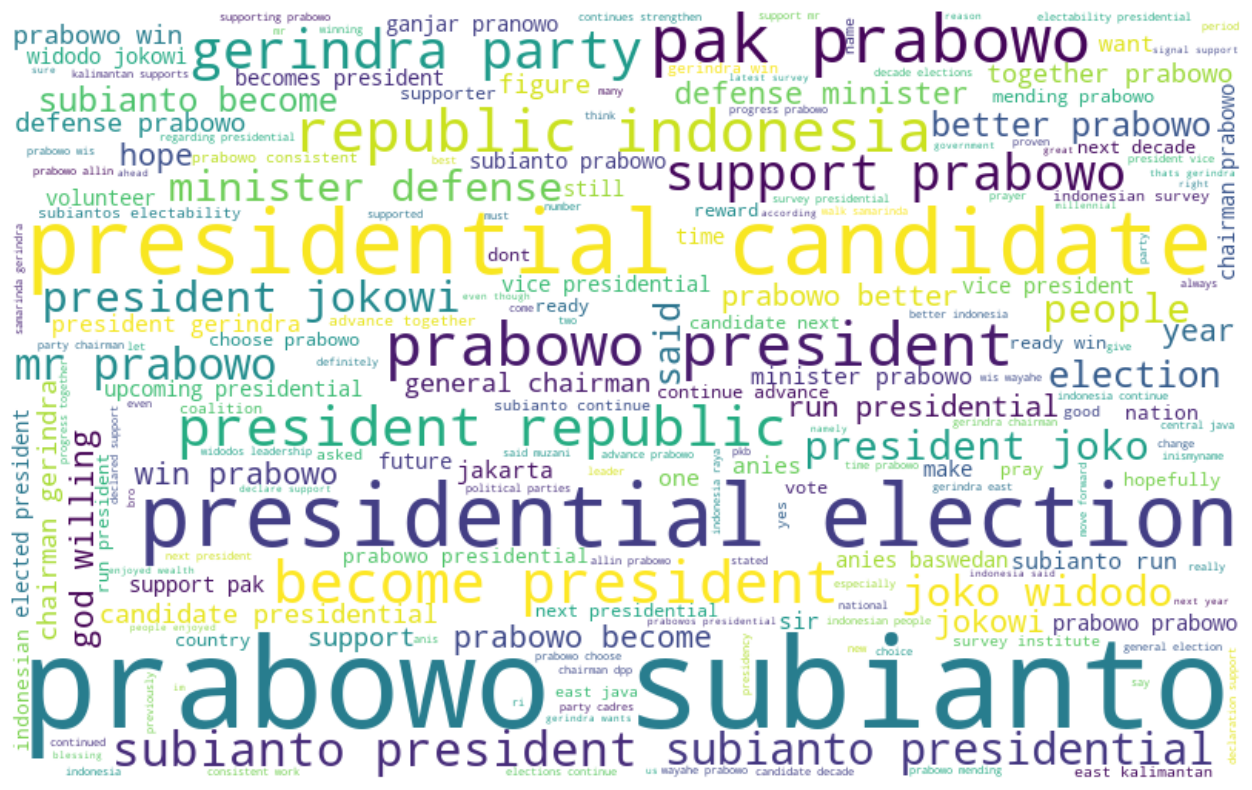

In [1231]:
# wordcloud untuk sentimen positif
df_p = df[df['sentiment'] == 1]
all_words_lem = ' '.join([word for word in df_p['text_string']])

from wordcloud import WordCloud
wordcloud = WordCloud(
    background_color='white', 
    width = 800, 
    height = 500, 
    random_state = 21, 
    max_font_size = 130
).generate(all_words_lem)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off');

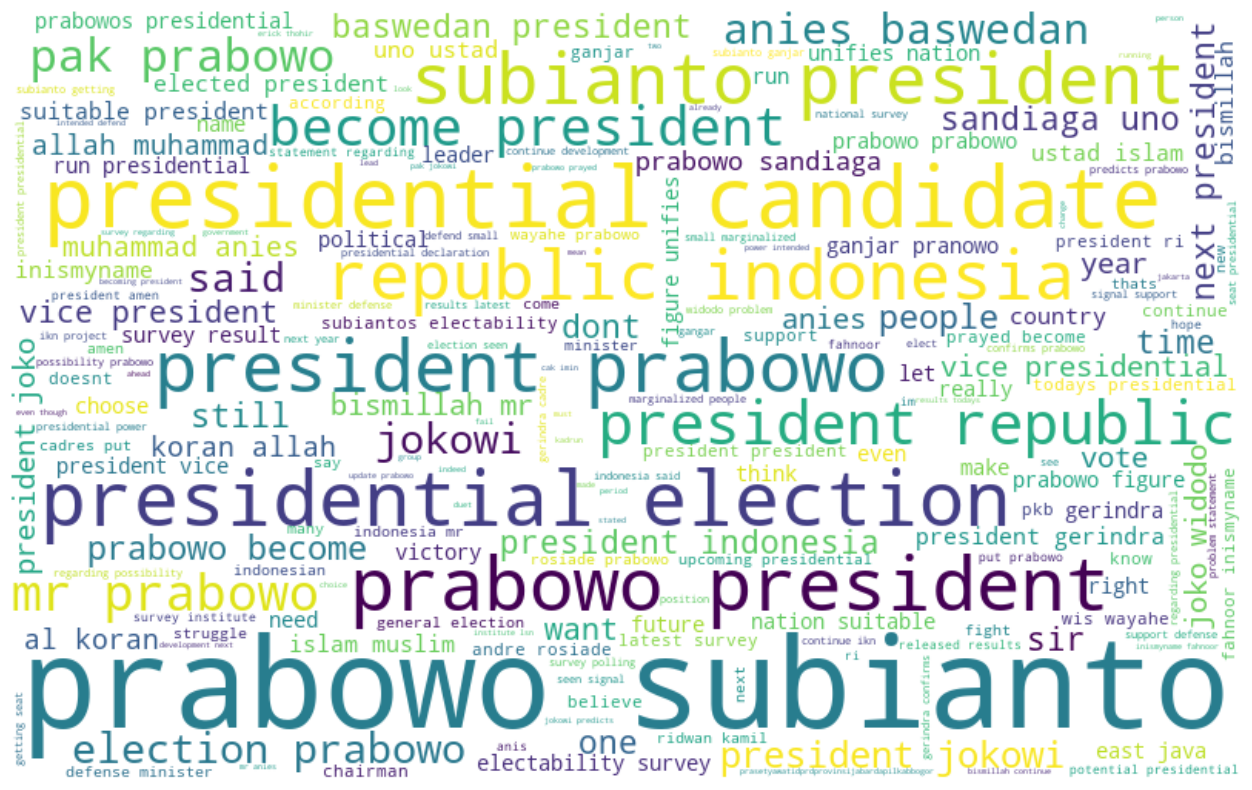

In [1232]:
# wordcloud untuk sentimen negatif
df_neg = df[df['sentiment'] == 0]
all_words_lemneg = ' '.join([word for word in df_neg['text_string']])

from wordcloud import WordCloud
wordcloud = WordCloud(
    background_color = 'white', 
    width = 800, 
    height = 500, 
    random_state = 21, 
    max_font_size = 130
).generate(all_words_lemneg)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Menerapkan TF-IDF

In [1233]:
# import TF-IDF vectorizer from sklearn library 
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['text_string']
y = df['sentiment']
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

MENAMPILKAN CONTOH HASIL TF-IDF

In [1234]:
# Mengambil TF-IDF pada baris ke-4004
feature_names = tfid.get_feature_names_out()
tfidf_row = X_final[4002]  # Mendapatkan TF-IDF baris ke-4004
tfidf_data = zip(feature_names, tfidf_row.toarray()[0])  # Menghubungkan fitur dengan nilainya

# Menampilkan TF-IDF nilai kata pada baris ke-4004
tfidf_values = {word: value for word, value in tfidf_data if value > 0}
print(tfidf_values)

{'fit': 0.4277461443491216, 'human': 0.4277461443491216, 'indonesia': 0.1662014128989312, 'prabowo': 0.07260511057197994, 'president': 0.08324625464591788, 'rights': 0.4398026288779566, 'serious': 0.41770937748297976, 'subianto': 0.10434090782994808, 'violator': 0.4641633547509107}


PEMBAGIAN DATA UNTUK TRAINING DAN TESTING

In [1236]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X_final , y, test_size = 0.2, random_state = 42)

MODEL NAIVE BAYES

akurasi =  0.82
[[377 123]
 [ 57 443]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       500
           1       0.78      0.89      0.83       500

    accuracy                           0.82      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000



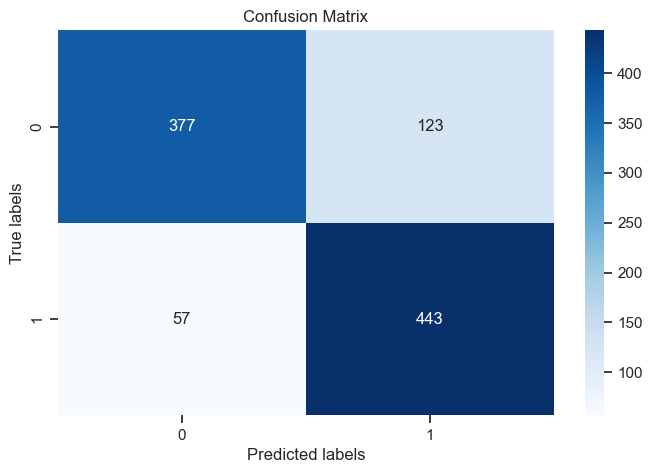

In [1238]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = MultinomialNB()
nb.fit(x_train,y_train)
nb_prediction =  nb.predict(x_test)
print("akurasi = ", accuracy_score(nb_prediction, y_test))
print(confusion_matrix(y_test, nb_prediction))
print(classification_report(y_test, nb_prediction))

# Anggap y_test dan random_forest_classifier_prediction sudah di-definisikan dari hasil prediksi model Anda
conf_matrix = confusion_matrix(y_test, nb_prediction)

# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')  # 'g' menghindari notasi saintifik
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

MENAMPILKAN DISTRIBUSI KATA

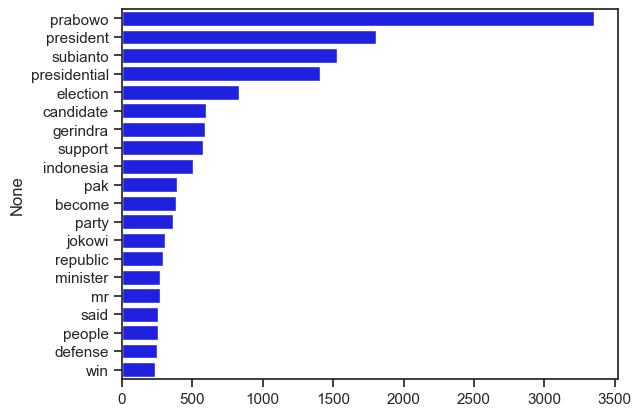

In [1239]:
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

# Obtain top 10 words
top_20 = fd.most_common(20)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_20))

sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');